# Sales Prediction vs Actuals: TV, Radio, and Newspaper

<img src=https://i.pinimg.com/474x/95/2f/7b/952f7bb4f9b139ae50f64f6a6542b492.jpg>

Bu projede TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevabını bulacağız.  
Data Kaggle'dan alınmıştır.   
Hedefimiz: R² > 80%, RMSE < $100K (0.80)

In [35]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import data datayı import et

In [3]:
df = pd.read_csv("advertising.csv")

### EDA - Exploratory Data Analysis

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

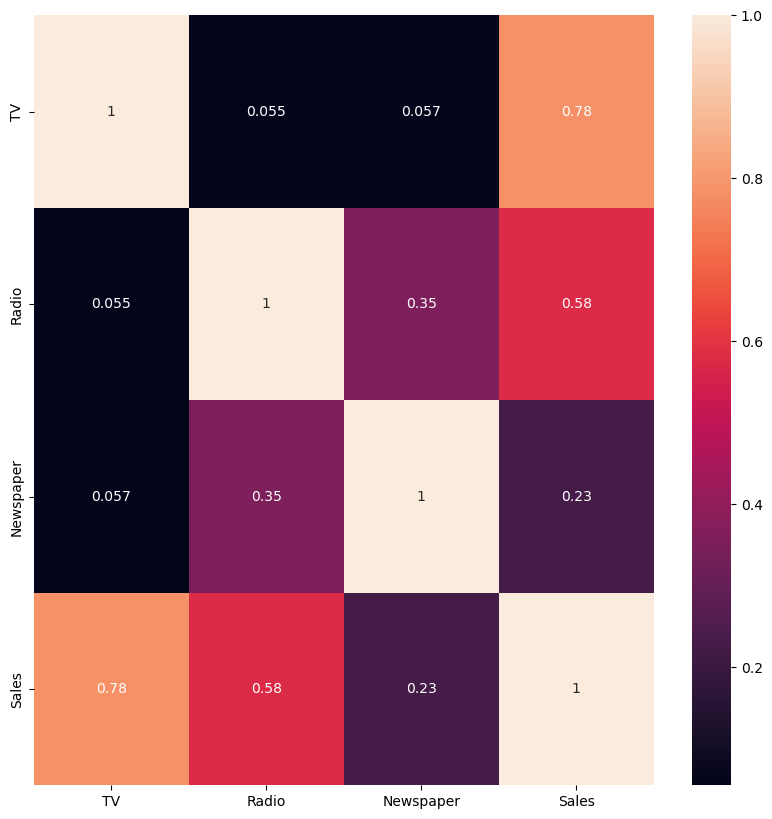

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [12]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

<Axes: xlabel='TV'>

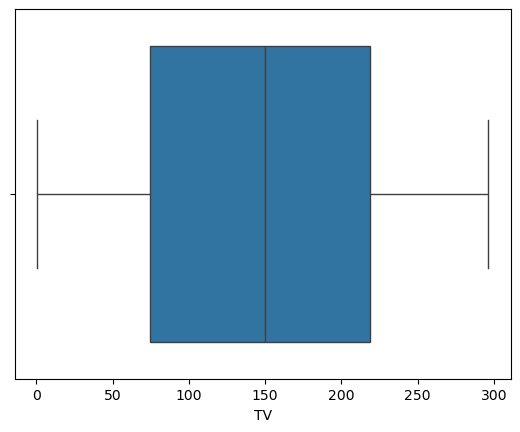

In [13]:
sns.boxplot(x=df['TV'])

<Axes: xlabel='Newspaper'>

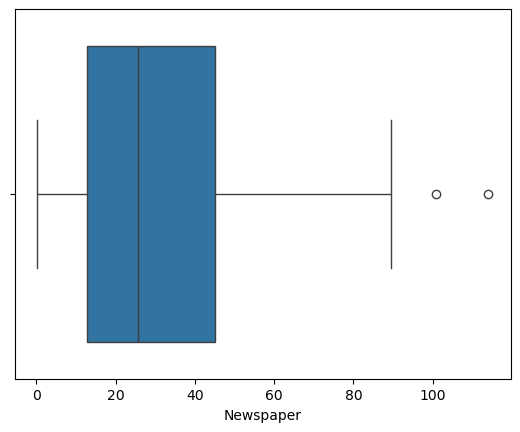

In [14]:
sns.boxplot(x=df['Newspaper'])

<Axes: xlabel='Radio'>

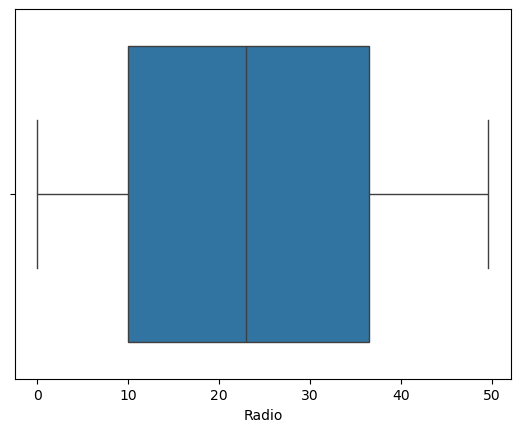

In [15]:
sns.boxplot(x=df['Radio'])

<Axes: xlabel='Sales', ylabel='Density'>

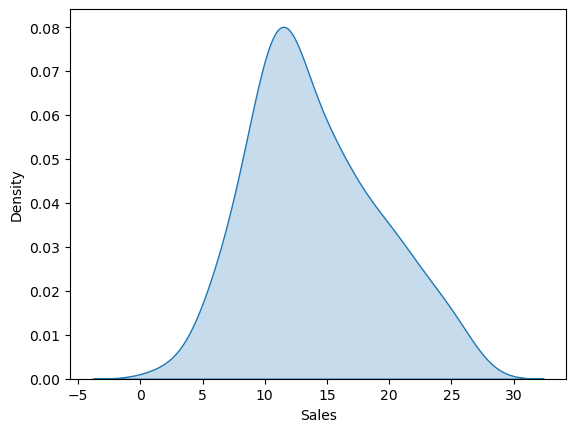

In [16]:
sns.kdeplot(x=df['Sales'], fill=True)

<Axes: xlabel='Sales', ylabel='Count'>

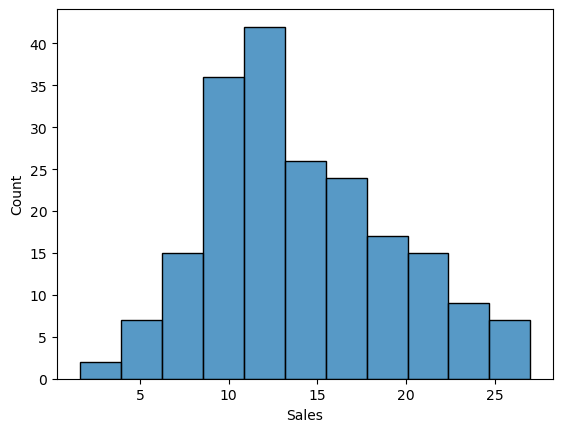

In [17]:
sns.histplot(x=df['Sales'])

### Feature Engineering

In [19]:
df.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


In [20]:
x = df[['TV','Radio','Newspaper']]

In [21]:
y = df['Sales']

### Modelling

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=42)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
tahmin = lr.predict(x_test)

In [26]:
r2_score(y_test, tahmin)

0.864341606388241

In [27]:
feature_importance = pd.DataFrame({'Feature': x_train.columns,'Coefs'  : lr.coef_}).sort_values('Coefs', ascending=False)

In [28]:
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

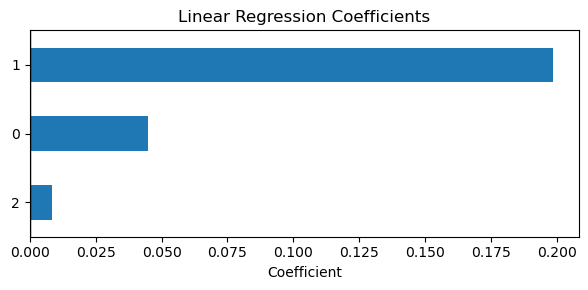

In [29]:
import matplotlib.pyplot as plt
ax = feature_importance.sort_values('Coefs').plot(kind='barh', figsize=(6,3), legend=False)
ax.set_title("Linear Regression Coefficients")
ax.set_xlabel("Coefficient")
ax.axvline(0, color='k', linewidth=1)
plt.tight_layout()
plt.show()

In [30]:
residuals = y_test.reset_index(drop=True) - pd.Series(tahmin)

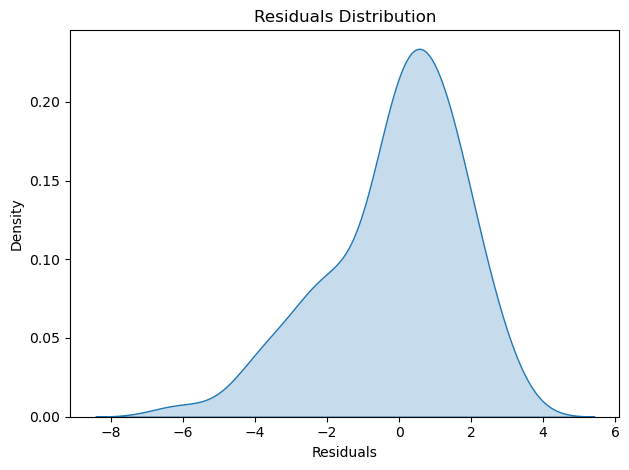

In [31]:
sns.kdeplot(x=residuals, fill=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

In [32]:
from yellowbrick.regressor import ResidualsPlot

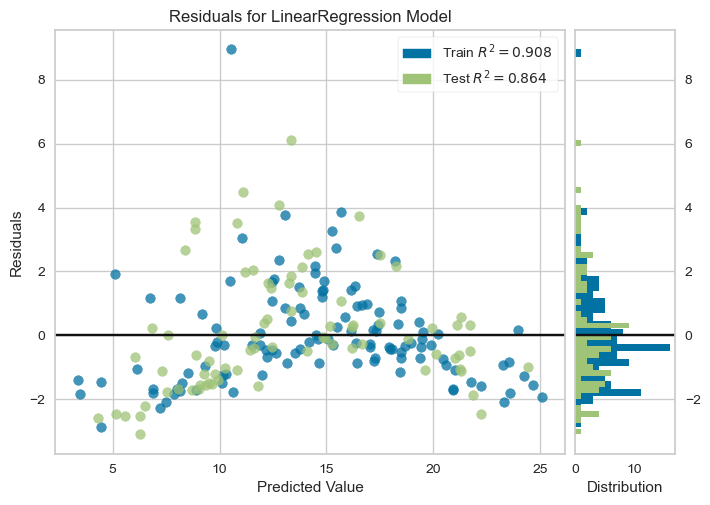

In [33]:
vis = ResidualsPlot(lr)
vis.fit(x_train, y_train)
vis.score(x_test, y_test)
vis.show()
plt.show()